In [6]:
# Set Variables and Import

import pickle
import os
from matplotlib import pyplot as plt

root_folder = '/home/Medalia/BWimmer/Benedikt/04_SFB/04_AlphaFold/210924_mSFB_SLayer_candidates/AID45073/AID45073'

os.chdir(root_folder)

Working on model 1
Working on model 2
Working on model 3
Working on model 4
Working on model 5


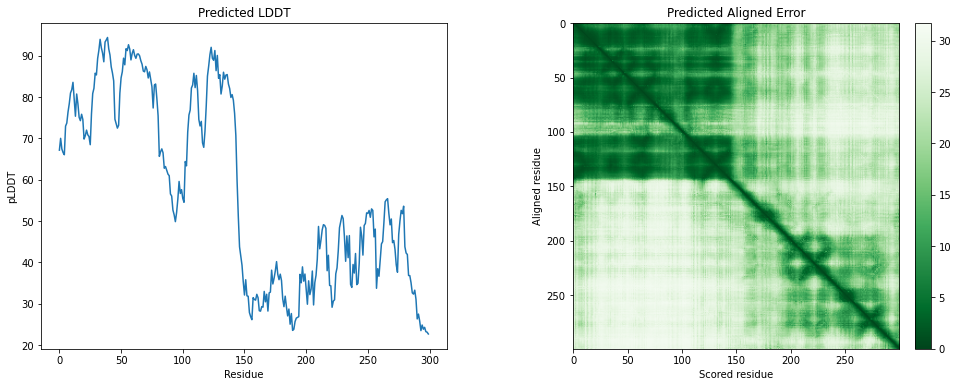

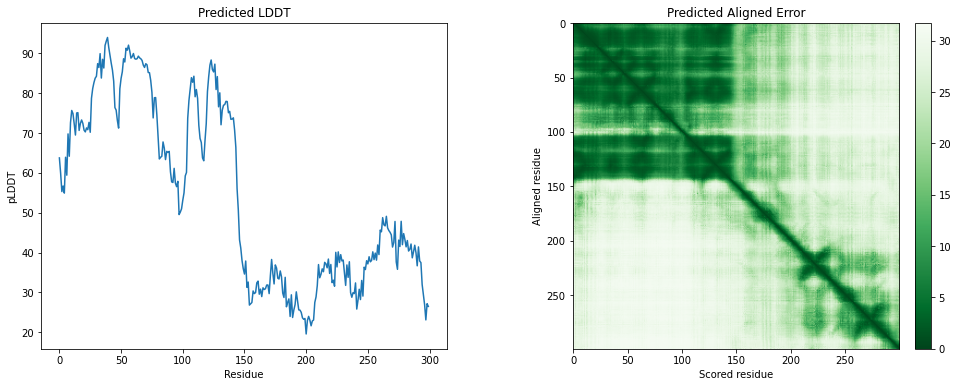

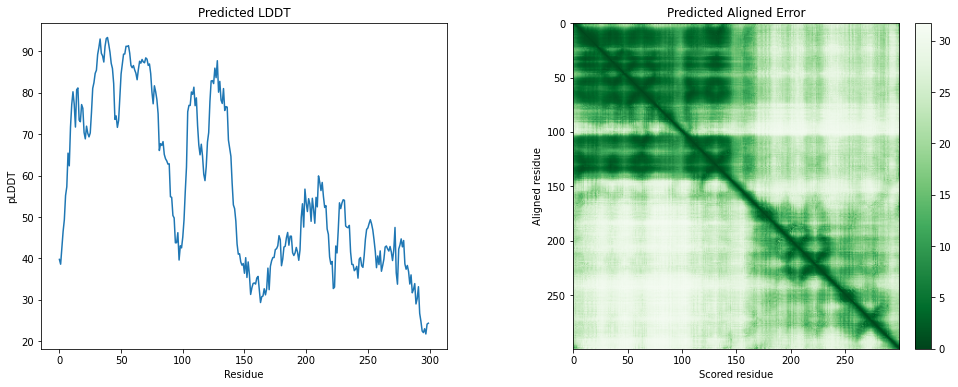

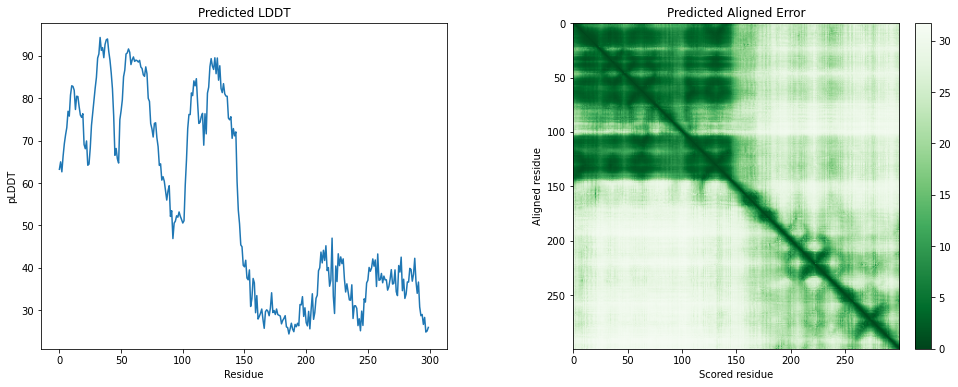

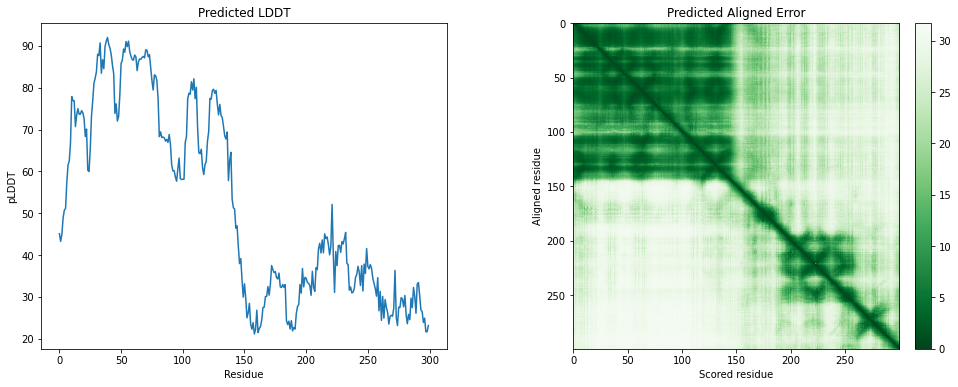

In [2]:
# Go through all models

for model in range(1,6,1):
    print(f"Working on model {model}")

    pklfile = "result_model_" + str(model) + "_ptm.pkl"
    exportfile = "plot_model_" + str(model) + ".pdf"
    
    with open(pklfile, 'rb') as f:
        data = pickle.load(f)
        
    data.keys()
    
    plddt = data["plddt"]

    plt.figure(figsize=[8 * 2, 6])
    plt.subplot(1, 2, 1)
    plt.plot(plddt)
    plt.title('Predicted LDDT')
    plt.xlabel('Residue')
    plt.ylabel('pLDDT')
     
    pae_output = (data['predicted_aligned_error'],
              data['max_predicted_aligned_error'])

    plt.subplot(1, 2, 2)
    pae, max_pae = pae_output
    plt.imshow(pae, vmin=0., vmax=max_pae, cmap='Greens_r')
    plt.colorbar(fraction=0.046, pad=0.04)

    plt.title('Predicted Aligned Error')
    plt.xlabel('Scored residue')
    plt.ylabel('Aligned residue')
    plt.savefig(exportfile)

In [53]:
# Check, which model has the highest confidence (mean pLDDT)

import json

with open('ranking_debug.json') as f:
  ranking_dict = json.load(f)

best_model = (ranking_dict['order'])[0]

plddts = dict(ranking_dict['plddts'])
              
model_no = int(best_model.split('_')[1])

print(f"The best model is {best_model} with a mean pLDDT of {plddts.get(best_model)}.")

The best model is model_1_ptm with a mean pLDDT of 57.34438031652016.


In [7]:
# Perform 3D Visualization of best model with py3Dmol

import p3Dmol
import pickle

print(f"Loading model {model_no}")

pklfile = "result_model_" + str(model_no) + "_ptm.pkl"
    
with open(pklfile, 'rb') as f:
    data = pickle.load(f)
        
data.keys()
    
plddt = data["plddt"]

def plot_plddt_legend():
     """Plots the legend for pLDDT."""
    thresh = ['Very low (pLDDT < 50)',
            'Low (70 > pLDDT > 50)',
            'Confident (90 > pLDDT > 70)',
            'Very high (pLDDT > 90)']

    colors = [x[2] for x in PLDDT_BANDS]

    plt.figure(figsize=(2, 2))
    for c in colors:
        plt.bar(0, 0, color=c)
    plt.legend(thresh, frameon=False, loc='center', fontsize=20)
    plt.xticks([])
    plt.yticks([])
    ax = plt.gca()
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    plt.title('Model Confidence', fontsize=20, pad=20)
    return plt

view = py3Dmol.view(width=400, height=300)
view.addModelsAsFrames(system)
view.setStyle({'model': -1}, {"cartoon": {'color': 'spectrum'}})
view.zoomTo()
view.show()

show_sidechains = True

to_visualize_pdb = system

# Color the structure by per-residue pLDDT
color_map = {i: bands[2] for i, bands in enumerate(PLDDT_BANDS)}
view = py3Dmol.view(width=800, height=600)
view.addModelsAsFrames(to_visualize_pdb)
style = {'cartoon': {'colorscheme': {'prop': 'b', 'map': color_map}}}
if show_sidechains:
  style['stick'] = {}
view.setStyle({'model': -1}, style)
view.zoomTo()

grid = GridspecLayout(1, 2)
out = Output()
with out:
  view.show()
grid[0, 0] = out

out = Output()
with out:
  plot_plddt_legend().show()
grid[0, 1] = out

display.display(grid)

ModuleNotFoundError: No module named 'p3Dmol'